In [1]:
dir = "/Users/wciezobka/sano/projects/masters-thesis/Results/lime/20240410-164742_LTP/explanations"

import glob
import os
import numpy as np
import matplotlib.pylab as plt
import sklearn
import scipy.stats
import networkx as nx
from surfplot import Plot
import brainstat.datasets as datasets

In [2]:
files = glob.glob(dir+"/*")
xs_stroke = np.array([np.load(f) for f in glob.glob(dir+"/*PAT*")])
xs_control = np.array([np.load(f) for f in glob.glob(dir+"/*CON*")])

In [3]:
xs_stroke_abs = np.abs(xs_stroke)
xs_control_abs = np.abs(xs_control)

In [4]:
schaefer = datasets.fetch_parcellation('fsaverage5','schaefer',100)


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/3129730903.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


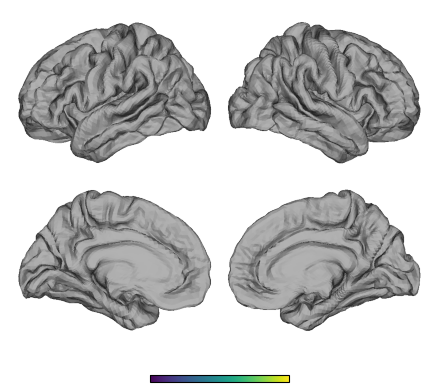

In [5]:
import brainstat
import brainstat.datasets
from brainspace.plotting import plot_hemispheres
from brainspace.utils.parcellation import map_to_labels
schaefer = brainstat.datasets.fetch_parcellation('fsaverage5','schaefer',100)
lh, rh = brainstat.datasets.fetch_template_surface('fsaverage5', join=False)

th = 0.002

# control positive
assignment = xs_control.sum(axis=0)>=th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/1963684746.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


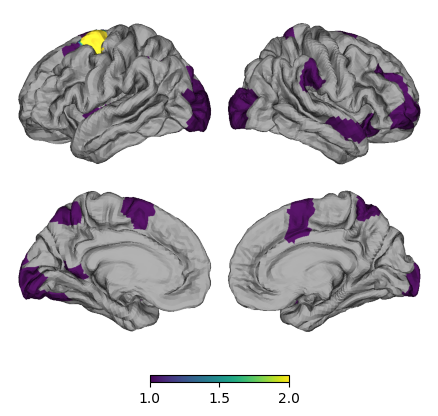

In [6]:
# stroke positive
aa=xs_stroke.sum(axis=0)
assignment = xs_stroke.sum(axis=0)>=th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()

In [7]:
assignment = xs_stroke.sum(axis=0)>=th
assignment.shape

(100, 100)

(20484,)


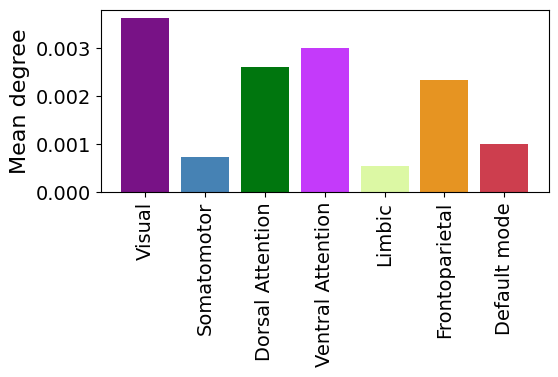

In [8]:
from brainstat.datasets import fetch_yeo_networks_metadata
from brainstat.datasets import fetch_parcellation
yeo_networks = fetch_parcellation("fsaverage5", "yeo", 7)
network_names, yeo_colormap = fetch_yeo_networks_metadata(7)

import matplotlib.pyplot as plt
from scipy.stats import sem

from brainstat.context.resting import yeo_networks_associations
assignment = xs_stroke.sum(axis=0)>=th
assignment = assignment.mean(axis=0)
xx = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)


print(xx.shape)

yeo_tstat_mean = yeo_networks_associations(xx, "fsaverage5")
yeo_tstat_sem = yeo_networks_associations(
    xx,
    "fsaverage5",
    reduction_operation=lambda x, y: sem(x, nan_policy="omit"),
)

plt.bar(
    np.arange(7),
    yeo_tstat_mean[:, 0],
    color=yeo_colormap,
    error_kw={"elinewidth": 5},
)
plt.xticks(np.arange(7), network_names, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Mean degree", fontdict={"fontsize": 16})
plt.gcf().subplots_adjust(left=0.2, bottom=0.5)
plt.show()



In [9]:
assignment = xs_control.sum(axis=0)
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)


In [10]:
xs_control.shape

(20, 100, 100)

/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/2191410896.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


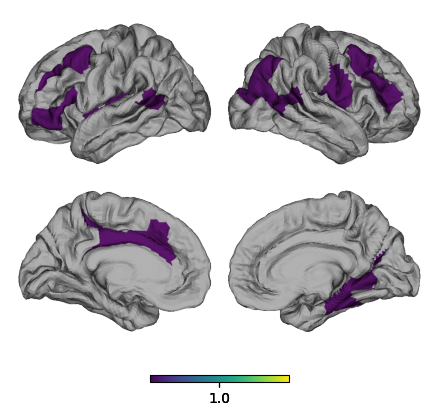

In [11]:
# control negative
aa=xs_control.sum(axis=0)
assignment = xs_control.sum(axis=0)<=-th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


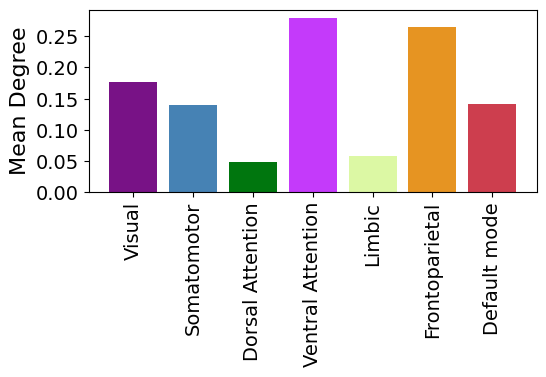

In [12]:
assignment = xs_control.sum(axis=0)<=-th
assignment = assignment.sum(axis=0)
xx = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)

yeo_tstat_mean = yeo_networks_associations(xx, "fsaverage5")
yeo_tstat_sem = yeo_networks_associations(
    xx,
    "fsaverage5",
    reduction_operation=lambda x, y: sem(x, nan_policy="omit"),
)

plt.bar(
    np.arange(7),
    yeo_tstat_mean[:, 0],
    color=yeo_colormap,
    error_kw={"elinewidth": 5},
)
plt.xticks(np.arange(7), network_names, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Mean Degree", fontdict={"fontsize": 16})
plt.gcf().subplots_adjust(left=0.2, bottom=0.5)
plt.show()


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/2662147615.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


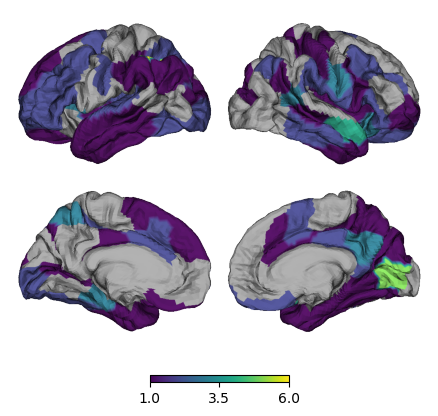

In [13]:
# stroke negative
assignment = xs_stroke.sum(axis=0)<=-th
assignment = assignment.sum(axis=0)
xx = assignment_surface = map_to_labels(assignment, schaefer, mask=schaefer!=0)
xx = xx.astype(float)
#xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()



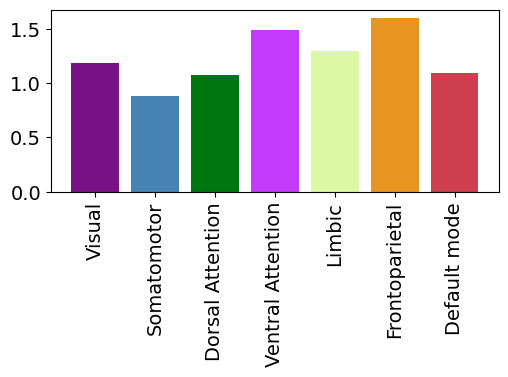

In [14]:
yeo_tstat_mean = yeo_networks_associations(xx, "fsaverage5")
yeo_tstat_sem = yeo_networks_associations(
    xx,
    "fsaverage5",
    reduction_operation=lambda x, y: sem(x, nan_policy="omit"),
)

plt.bar(
    np.arange(7),
    yeo_tstat_mean[:, 0],
    color=yeo_colormap,
    error_kw={"elinewidth": 5},
)
plt.xticks(np.arange(7), network_names, rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("", fontdict={"fontsize": 16})
plt.gcf().subplots_adjust(left=0.2, bottom=0.5)
plt.show()


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/3196549785.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


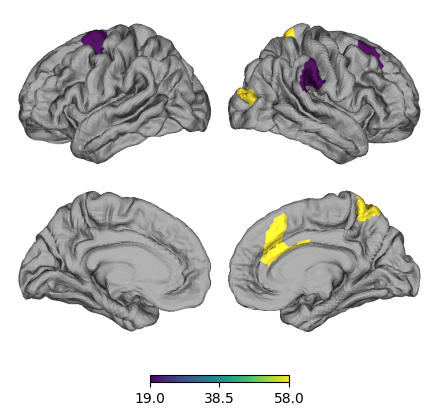

In [15]:
th = 0.002
assignment = xs_stroke.sum(axis=0)>=th
ccs = nx.community.louvain_communities(nx.from_numpy_array(assignment, create_using=nx.DiGraph))

to_plot = np.zeros((100,))
for i, c in enumerate(ccs):
    for n in c:
        if len(c) >= 3:
            to_plot[n] = i
        else:
            to_plot[n] = 0
to_plot_surface = map_to_labels(to_plot, schaefer, mask=schaefer!=0, fill=np.nan)
xx=to_plot_surface
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()


/var/folders/bq/tb_cjs010kx_w5_vcqdxpr340000gn/T/ipykernel_12202/237814462.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


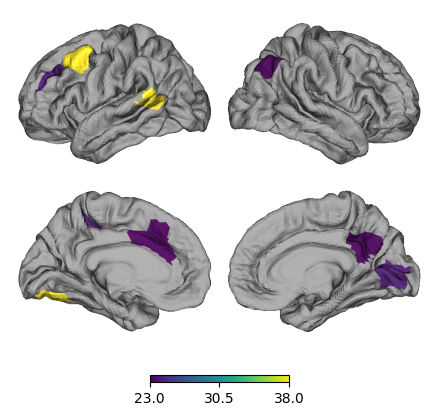

In [16]:
th = 0.002
assignment = xs_control.sum(axis=0)<=-th
ccs = nx.community.louvain_communities(nx.from_numpy_array(assignment, create_using=nx.DiGraph))

to_plot = np.zeros((100,))
for i, c in enumerate(ccs):
    for n in c:
        if len(c) >= 3:
            to_plot[n] = i
        else:
            to_plot[n] = 0
to_plot_surface = map_to_labels(to_plot, schaefer, mask=schaefer!=0, fill=np.nan)
xx=to_plot_surface
xx = xx.astype(float)
xx[xx==0]=np.nan
p = Plot(lh, rh)
p.add_layer(xx)
fig = p.build()
fig.show()